<a href="https://colab.research.google.com/github/Jonathancleetus/eda_data_visualisation_ott/blob/main/EDA_%26_Visualisation_of_OTT_platform_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data & Notebook initiation

In [ ]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/netflix_dataset.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Processing
1.   Unesting columns
2.   null
3.   date conversion
4.   duration



In [ ]:
print(data["show_id"].nunique(),data.count())

8807 show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
cast_cons = data["cast"].apply(lambda x : str(x).split(",")).tolist() # slipting the nested value based on "," and converting this to a list.

In [ ]:
data_new_cast = pd.DataFrame(cast_cons, index = data["title"]) # The list is converted to a pandas dataframe so that the list are

In [ ]:
data_new_cast = data_new_cast.stack()

In [ ]:
data_new_cast = pd.DataFrame(data_new_cast.reset_index())

In [ ]:
data_new_cast.rename(columns = {0:"actor"},inplace = True)
data_new_cast.drop(["level_1"],axis=1,inplace=True)

In [ ]:
df = data_new_cast.merge(data[['show_id','type','title','director','country','date_added','release_year','rating','duration','listed_in','description']],on=["title"],how="left")

In [ ]:
genre_cons = df["listed_in"].apply(lambda x: str(x).split(",")).tolist()
df_genre = pd.DataFrame(genre_cons, index=df["title"])

In [ ]:
df_genre = df_genre.stack()

In [ ]:
df_genre = pd.DataFrame(df_genre)
df_genre = pd.DataFrame(df_genre.reset_index())

In [ ]:
df_genre.rename(columns = {0:"genre"}, inplace=True)
df_genre.drop(["level_1"],axis=1,inplace=True)

In [ ]:
df = df_genre.merge(df[['title','actor','show_id','type','director','country','date_added','release_year','rating','duration']],on=["title"],how="left")

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), format='%B %d, %Y')

In [ ]:
data["date_added"] = pd.to_datetime(data["date_added"].str.strip(), format='%B %d, %Y')

In [ ]:
df.isnull().sum()

,0
title,0
genre,0
actor,0
show_id,0
type,0
director,536723
country,110077
date_added,1604
release_year,0
rating,1119


In [ ]:
df.head()

,title,genre,actor,show_id,type,director,country,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,nan,s1,Movie,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min
1,Blood & Water,International TV Shows,Ama Qamata,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,International TV Shows,Khosi Ngema,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,International TV Shows,Gail Mabalane,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,International TV Shows,Thabang Molaba,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons


# Analysis based on Month



*   There is no specific month or season which we can say that produces most number of movies or TV shows
*   There seems to be less number of films released during mid-year, but the difference is not significant.
*   United States and Inida are the two main countries that prodices most number of films and TV show, and these two idustries are unaffected by months. The spread of new films are almost uniform althrough teh year.
*   If trying to release a film go for 2nd half of an year, but should be noted that months doesn't reallly matter based on the dataset.  





In [ ]:
print(data[data["country"] == "India"]["date_added"].dt.month.value_counts())

date_added
12    109
4     107
10    103
3     101
8      91
11     90
7      79
9      67
5      62
1      62
2      54
6      47
Name: count, dtype: int64


In [ ]:
print(data[data["country"] == "United States"]["date_added"].dt.month.value_counts())

date_added
1.0     299
11.0    264
7.0     253
12.0    243
9.0     241
8.0     233
10.0    231
3.0     224
4.0     220
6.0     216
2.0     200
5.0     188
Name: count, dtype: int64


In [ ]:
print(data[(data["country"] == "India") & (data["type"] == "Movie")]["date_added"].dt.month.value_counts())

date_added
12    103
10     96
4      92
3      88
11     87
8      86
7      76
9      61
1      60
5      54
2      50
6      40
Name: count, dtype: int64


In [ ]:
print(data[(data["country"] == "India") & (data["type"] == "TV Show")]["date_added"].dt.month.value_counts())

date_added
4     15
3     13
5      8
10     7
6      7
9      6
12     6
8      5
2      4
11     3
7      3
1      2
Name: count, dtype: int64


In [ ]:
print(data["country"].value_counts())

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


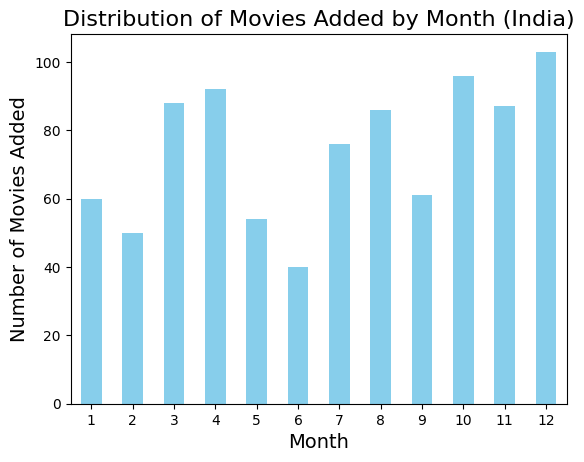

In [ ]:
# Filter the data
filtered_data = data[(data["country"] == "India") & (data["type"] == "Movie")]

# Extract the month from the "date_added" column and count occurrences
month_counts = filtered_data["date_added"].dt.month.value_counts().sort_index()

# Plotting the distribution as a bar chart
month_counts.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Distribution of Movies Added by Month (India)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Movies Added', fontsize=14)
plt.xticks(rotation=0)

# Show the plot
plt.show()

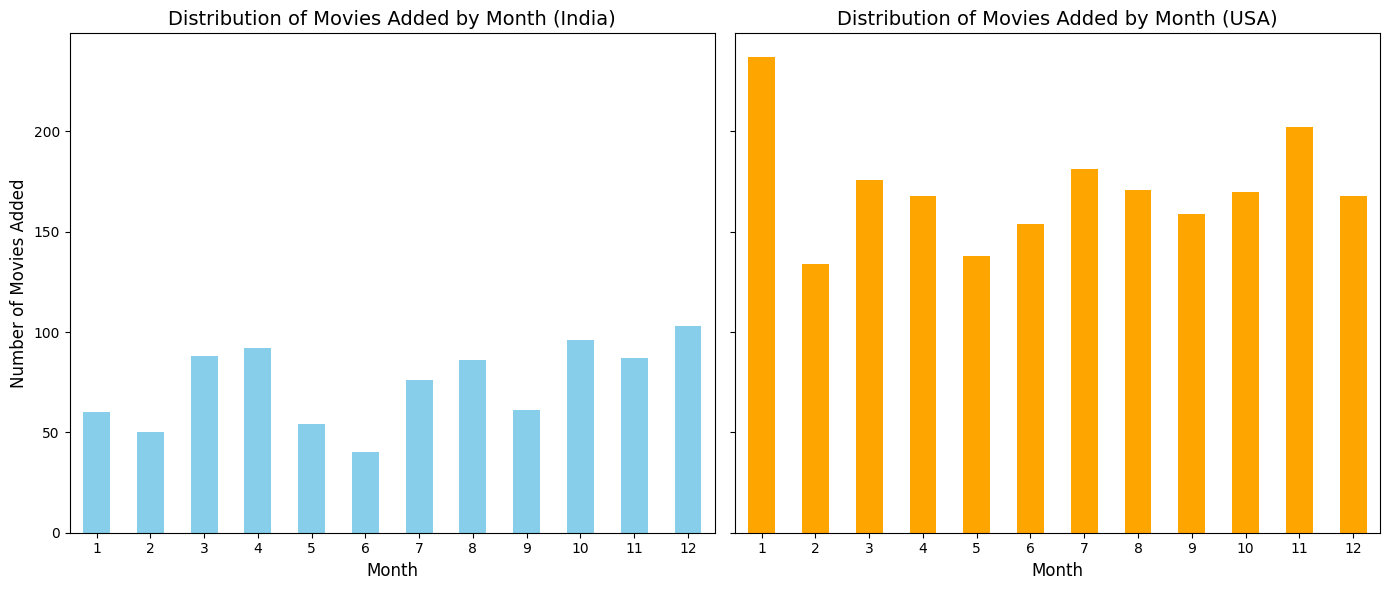

In [ ]:
# Filter the data
filtered_data_ind = data[(data["country"] == "India") & (data["type"] == "Movie")]
filtered_data_usa = data[(data["country"] == "United States") & (data["type"] == "Movie")]

# Extract the month from the "date_added" column and count occurrences
month_counts_ind = filtered_data_ind["date_added"].dt.month.value_counts().sort_index()
month_counts_usa = filtered_data_usa["date_added"].dt.month.value_counts().sort_index()

# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the distribution for India on the first subplot
month_counts_ind.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Movies Added by Month (India)', fontsize=14)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Movies Added', fontsize=12)
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(range(1, 13), rotation=0)

# Plot the distribution for the USA on the second subplot
month_counts_usa.plot(kind='bar', color='orange', ax=axes[1])
axes[1].set_title('Distribution of Movies Added by Month (USA)', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(range(1, 13), rotation=0)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Movie Releases

In [ ]:
print(data["release_year"].value_counts())

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


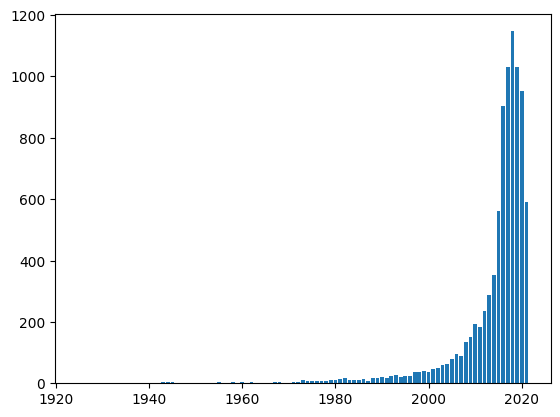

In [ ]:
# Distribution of movies over the years

plt.bar(data["release_year"].value_counts().index, data["release_year"].value_counts().values)
plt.show()

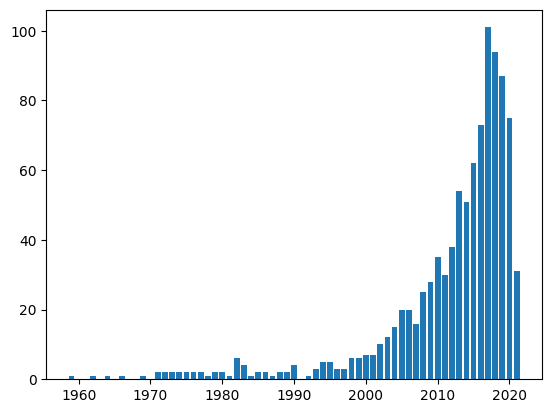

In [ ]:
# India saw gradual rise in films compared to USA.

plt.bar(data[(data["country"] =="India")]["release_year"].value_counts().index, data[(data["country"] =="India")]["release_year"].value_counts().values)
plt.show()

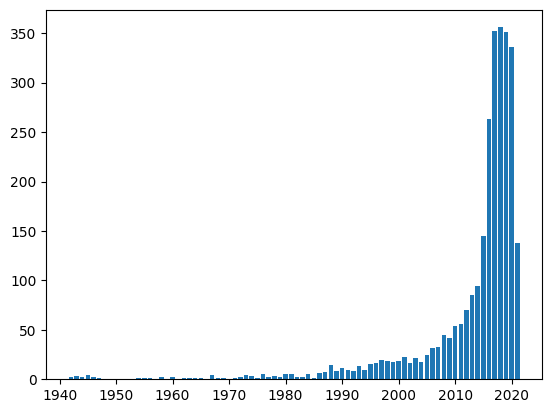

In [ ]:
# US saw an exponential growth in film releases.

plt.bar(data[(data["country"] =="United States")]["release_year"].value_counts().index, data[(data["country"] =="United States")]["release_year"].value_counts().values)
plt.show()

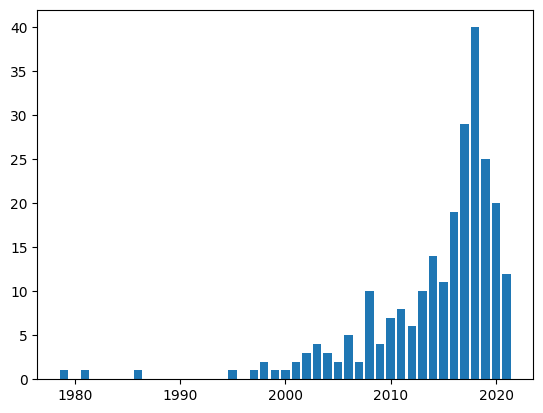

In [ ]:
plt.bar(data[(data["country"] =="Japan")]["release_year"].value_counts().index, data[(data["country"] =="Japan")]["release_year"].value_counts().values)
plt.show()

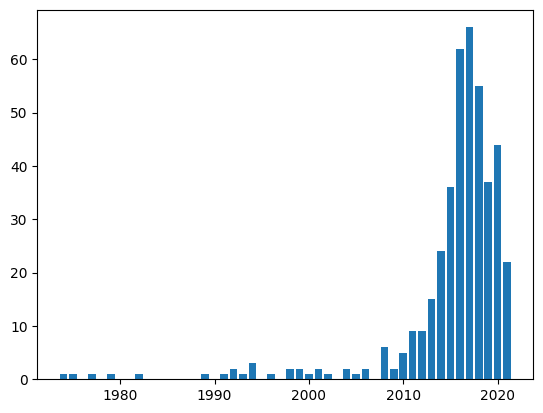

In [ ]:
plt.bar(data[(data["country"] =="United Kingdom")]["release_year"].value_counts().index, data[(data["country"] =="United Kingdom")]["release_year"].value_counts().values)
plt.show()

# Movie vs TV Shows

*   According to data in general TV Shows are getting popularity compared to Movies and they are getting momentum
*   In India the situation is different, people are turning to TV SHows when Movies are few. SO in India Netflix spend more on TV Shows if Movies are less in a particular year and vice versa. And, this might be because of low number TV Shows available.
*   In US TV Shos are gainig huge momentum, in latest years they have supassed movie and they are gaining a steady progress. So in US Netflix can focus more on TV Shows as they are gainig huge popularity.
*   The same is with UK and Japan, there is a bright future for TV SHows in UK and Japan.





In [ ]:
data["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
print(data[(data["type"] == "TV Show")]["country"].value_counts())

country
United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 196, dtype: int64


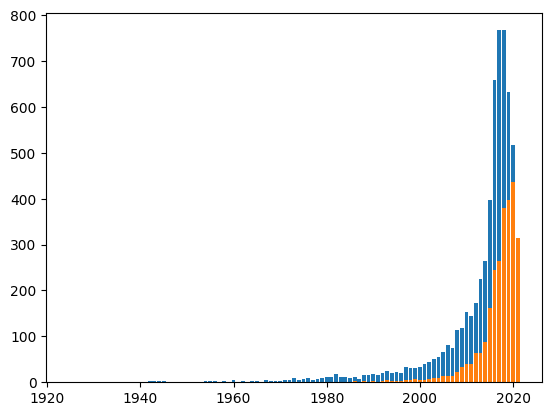

In [ ]:
plt.bar(data[(data["type"] == "Movie")]["release_year"].value_counts().index,data[(data["type"] == "Movie")]["release_year"].value_counts().values)
plt.bar(data[(data["type"] == "TV Show")]["release_year"].value_counts().index,data[(data["type"] == "TV Show")]["release_year"].value_counts().values)

plt.show()

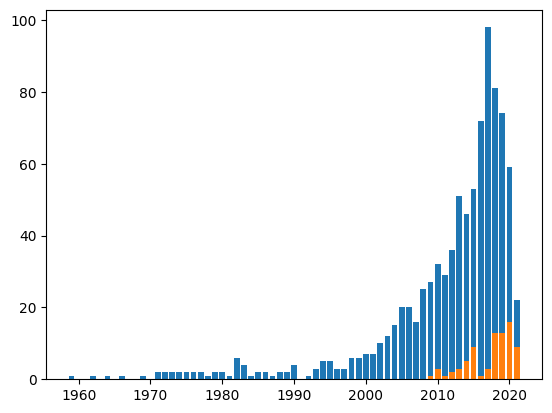

In [ ]:
# India people are turning to TV Shows only when movie releases are coming down, else indians stick to movie. During the last couple of years TV show is getting popularity but its marginal.

plt.bar(data[(data["type"] == "Movie") & (data["country"] == "India")]["release_year"].value_counts().index,data[(data["type"] == "Movie") & (data["country"] == "India")]["release_year"].value_counts().values)
plt.bar(data[(data["type"] == "TV Show") & (data["country"] == "India")]["release_year"].value_counts().index,data[(data["type"] == "TV Show") & (data["country"] == "India")]["release_year"].value_counts().values)
plt.show()

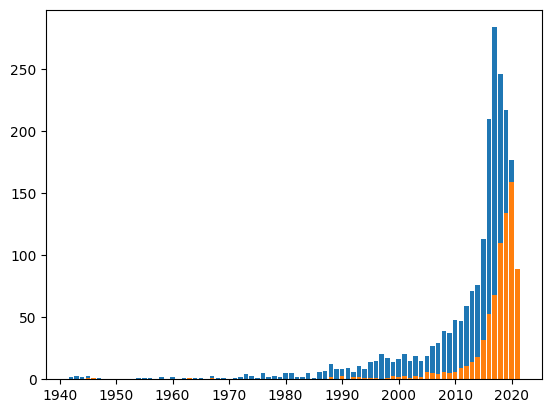

In [ ]:
# In US the trend is opposite both movie and TV Show are gaining momentum, but observed carefully TV Show are gaining more popularity than Movie and their gap is getting narrower.

plt.bar(data[(data["type"] == "Movie") & (data["country"] == "United States")]["release_year"].value_counts().index,data[(data["type"] == "Movie") & (data["country"] == "United States")]["release_year"].value_counts().values)
plt.bar(data[(data["type"] == "TV Show") & (data["country"] == "United States")]["release_year"].value_counts().index,data[(data["type"] == "TV Show") & (data["country"] == "United States")]["release_year"].value_counts().values)
plt.show()

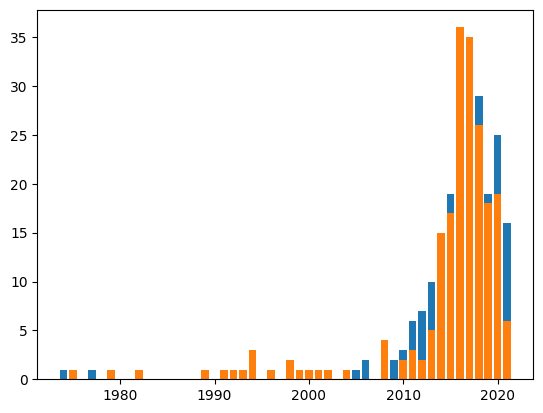

In [ ]:
plt.bar(data[(data["type"] == "TV Show") & (data["country"] == "United Kingdom")]["release_year"].value_counts().index,data[(data["type"] == "TV Show") & (data["country"] == "United Kingdom")]["release_year"].value_counts().values)
plt.bar(data[(data["type"] == "Movie") & (data["country"] == "United Kingdom")]["release_year"].value_counts().index,data[(data["type"] == "Movie") & (data["country"] == "United Kingdom")]["release_year"].value_counts().values)

plt.show()

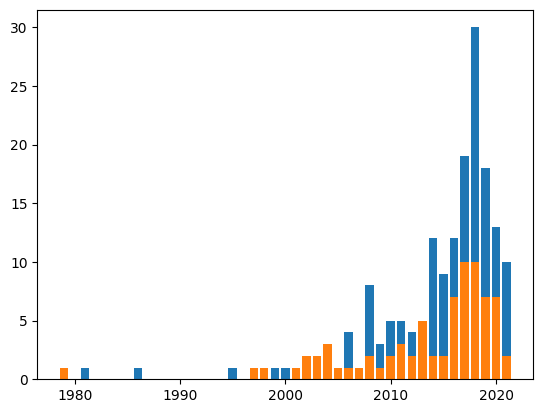

In [ ]:
plt.bar(data[(data["type"] == "TV Show") & (data["country"] == "Japan")]["release_year"].value_counts().index,data[(data["type"] == "TV Show") & (data["country"] == "Japan")]["release_year"].value_counts().values)
plt.bar(data[(data["type"] == "Movie") & (data["country"] == "Japan")]["release_year"].value_counts().index,data[(data["type"] == "Movie") & (data["country"] == "Japan")]["release_year"].value_counts().values)

plt.show()

# Analysis on Actors

In [ ]:
df.head()

,title,genre,actor,show_id,type,director,country,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,nan,s1,Movie,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min
1,Blood & Water,International TV Shows,Ama Qamata,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,International TV Shows,Khosi Ngema,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,International TV Shows,Gail Mabalane,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,International TV Shows,Thabang Molaba,s2,TV Show,NaN,South Africa,2021-09-24,2021,TV-MA,2 Seasons


In [ ]:
df["actor"].value_counts()

,count
actor,
nan,1504
Takahiro Sakurai,1014
Anupam Kher,1010
Yuki Kaji,897
Junichi Suwabe,745
...,...
Vandana Hart,1
Rory Scovel,1
Blair Brown,1


In [ ]:
ff = df.groupby(by = ("actor"))

In [ ]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
avg_rating = df.groupby('actor')['rating'].apply(lambda x: x.mode().values)

In [ ]:
avg_rating

,rating
actor,
Jr.,[TV-MA]
"""Riley"" Lakdhar Dridi",[TV-MA]
'Najite Dede,[TV-MA]
2 Chainz,[TV-MA]
2Mex,[TV-MA]
...,...
İbrahim Büyükak,[TV-MA]
İbrahim Çelikkol,[TV-MA]
Şahin Irmak,[TV-MA]


In [ ]:
# Content ratings:

# G (General Audience)
# PG (Parental Guidance)
# PG-13 (Parents Strongly Cautioned)
# R (Restricted)
# NC-17 (Adults Only)
# TV ratings:

# TV-Y (All Children)
# TV-Y7 (Directed to Older Children)
# TV-Y7-FV (Directed to Older Children - Fantasy Violence)
# TV-G (General Audience)
# TV-PG (Parental Guidance)
# TV-14 (Parents Strongly Cautioned)
# TV-MA (Mature Audiences)
# Additional:

# NR (Not Rated)
# UR (Unrated)

In [ ]:
df_actor = pd.DataFrame(df[(df["country"] == "India")]["actor"].value_counts().head(50))

In [ ]:
df_actor

,count
actor,
Anupam Kher,951
Shah Rukh Khan,662
Paresh Rawal,633
Akshay Kumar,599
Om Puri,545
...,...
Suman Mukhopadhyay,2
Kenny Sebastian,1
Aditi Mittal,1


In [ ]:
actor_genre = pd.DataFrame(df[df["country"]=="India"].groupby("actor")["genre"].agg(lambda x:x.mode()[0]))

In [ ]:
actor_genre.join(df_actor, on="actor",how="inner")

,genre,count
actor,,
Alok Nath,International Movies,310
Amrish Puri,International Movies,414
Anupam Kher,International Movies,951
Asrani,International Movies,476
Boman Irani,International Movies,523
Brijendra Kala,International Movies,255
Gulshan Grover,International Movies,336
Himani Shivpuri,International Movies,259
Jackie Shroff,International Movies,319


In [ ]:
df["genre"].value_counts()

,count
genre,
International Movies,177837
Dramas,125223
Comedies,108659
TV Dramas,84813
Action & Adventure,83810
...,...
Romantic Movies,152
Stand-Up Comedy,62
TV Sci-Fi & Fantasy,49


In [ ]:
df[df["country"]=="India"].groupby("actor")["genre"].agg(lambda x:x.mode()[0])

,genre
actor,
A.K. Hangal,International Movies
A.S. Sasi Kumar,Independent Movies
Aabhas Yadav,Dramas
Aadarsh Balakrishna,International Movies
Aadhya Anand,TV Dramas
...,...
Yograj Singh,International Movies
Yudhveer Bakoliya,Dramas
Zaira Wasim,International Movies


In [ ]:
df_actor_genre_non_int = pd.DataFrame(df[(df["country"]=="India") & (df["genre"] != "International Movies")].groupby("actor")["genre"].agg(lambda x:x.mode()[0]))

In [ ]:
df_actor_genre_non_int.value_counts()

,count
genre,
International Movies,2172
Dramas,629
Independent Movies,508
Comedies,128
Thrillers,78
TV Dramas,60
TV Comedies,56
Romantic TV Shows,49
International TV Shows,32


In [ ]:
df_actor_genre_non_int.join(df_actor, on="actor",how="inner")

,genre,count
actor,,
Alok Nath,International Movies,310
Amrish Puri,International Movies,414
Anupam Kher,International Movies,951
Asrani,International Movies,476
Boman Irani,International Movies,523
Brijendra Kala,International Movies,255
Gulshan Grover,International Movies,336
Himani Shivpuri,International Movies,259
Jackie Shroff,International Movies,319


In [ ]:
df[df["genre"] == "Dramas"]["actor"].value_counts().head(5)

,count
actor,
Rajesh Sharma,96
Alok Nath,94
David Oyelowo,93
Anupam Kher,93
Yashpal Sharma,89


In [ ]:
df[df["genre"] == "TV Dramas"]["actor"].value_counts().head(5)

,count
actor,
Ed Amatrudo,41
Shane Paul McGhie,41
Colin O'Donoghue,41
Virginia Gardner,41
Tom Brittney,41


In [ ]:
df[df["genre"] == "Dramas"]["actor"].value_counts().head(5)

In [ ]:
df[df["genre"] == "Dramas"]["actor"].value_counts().head(5)

In [ ]:
genre_list = df_actor_genre_non_int["Most_Occurring_Genre"].unique().tolist()

genre_list

[' International Movies',
 ' Independent Movies',
 ' Dramas',
 ' TV Dramas',
 ' TV Action & Adventure',
 ' Comedies',
 ' TV Horror',
 ' Romantic TV Shows',
 ' International TV Shows',
 'TV Shows',
 'Children & Family Movies',
 ' TV Comedies',
 ' Thrillers',
 ' Music & Musicals',
 ' Horror Movies',
 'Comedies',
 ' Cult Movies',
 'International TV Shows',
 ' Faith & Spirituality',
 ' Romantic Movies',
 ' Stand-Up Comedy & Talk Shows',
 'Dramas',
 'Action & Adventure',
 ' Classic Movies',
 'Reality TV',
 'Stand-Up Comedy']

In [ ]:
fin_df  = pd.DataFrame()

for i in genre_list:
  fin_df = fin_df.append(df[df["genre"] == i]["actor"].value_counts().head(2))

fin_df

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
fin_df_list = []  # Collect results in a list

for i in genre_list:
    temp_df = df[df["genre"] == i]["actor"].value_counts().head(2).to_frame() # Convert Series to DataFrame
    fin_df_list.append(temp_df)

fin_df = pd.concat(fin_df_list)  # Concatenate the list of DataFrames

fin_df

,count
actor,
Anupam Kher,301
Shah Rukh Khan,208
Rajit Kapoor,70
Naseeruddin Shah,68
Anupam Kher,142
Shah Rukh Khan,120
Benedict Wong,93
Hannah John-Kamen,76
Steven Yeun,59
